# Introduction to Databases in Python
- William Surles
- Nov 8, 2017
- Datacamp class
- [https://www.datacamp.com/courses/introduction-to-relational-databases-in-python](https://www.datacamp.com/courses/introduction-to-relational-databases-in-python)

## Whats Covered
- Basics of Relational Databases
 - Introduction to Databases
 - Connecting to your Database
 - Introduction to SQL
- Applying Filtering, Ordering, Grouping Queries
 - Filtering and Targeting Data
 - Overview of Ordering
 - Counting, Summing and Grouping Data
 - Lets use Pandas and Matplotlib to visualize our Data
- Advanced SQL Alchemy Queries
 - Calculating Values in a Query
 - SQL Relationships
 - Working with Hierarchical Tables
 - Dealing with Large ResultSets
- Creating and Manipulating your own Databases
 - Creating Databases and Tables
 - Inserting Data into a table
 - Updating Data in a Database
 - Removing Data From a Database
- Putting it all together
 - Census Case Study
 - Populating the Database
 - Example Queries

## Additional Resources

- [sqlalchemy documentation](http://docs.sqlalchemy.org/en/latest/core/engines.html#database-urls)

## Libraries and Data

In [120]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData, Table
import pandas as pd
import matplotlib.pyplot as plt

# Basics of Relational Databases

## Introduction to Databases

### Relational Model

- Tables are connected by keys. 
- In each table certain columns are the keys

## Connecting to your Database

#### Meet SQLAlchemy
- Two main pieces
 - Core (Relational Model focused)
 - ORM (User Data Model focused)

#### There are many types of databases
- SQLite, PostgreSQL, MySQL, MS SQL, Oracle, Many more
- SQLAlchemy provides a consistent way to work across all of these database types

#### Connecting to a database
- Engine: common interface to the databse from SQLAlchemy
- Connection string: All the details required to find the database (and login, if necessary)

In [223]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/census.sqlite')

connection = engine.connect()

#### Whats in your database?
- Once we know what tables we have we will use reflection to access the data
- Here I also looked up the inspect function which gives us finer grain access to the database objects (I think)

In [224]:
connection

In [225]:
engine

Engine(sqlite:///data/census.sqlite)

In [226]:
engine.table_names()

['census', 'state_fact']

In [227]:
from sqlalchemy import inspect
inspector = inspect(engine)

inspector.get_table_names()


['census', 'state_fact']

#### Reflection
- Reflection reads database and builds SQLAlchemy Table objects

In [228]:
from sqlalchemy import MetaData, Table
metadata = MetaData()
census = Table('census', metadata, autoload=True, autoload_with=engine)
print(repr(census))

Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)


### Engines and Connection Strings

In [229]:
# Create an engine that connects to the census.sqlite file: engine
engine = create_engine('sqlite:///data/census.sqlite')

# Print table names
print(engine.table_names())


['census', 'state_fact']


### Autoloading Tables from a Database

In [230]:
# Reflect census table from the engine: census
census = Table('census', metadata, autoload=True, autoload_with=engine)

# Print census table metadata
print(repr(census))

Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)


### Viewing Table Details
- It is important to get an understanding of your database by examining the column names. 
- This can be done by using the .columns attribute and accessing the .keys() method. 
 - For example, census.columns.keys() would return a list of column names of the census table.

- Following this, we can use the metadata container to find out more details about the reflected table such as the columns and their types. 
 - For example, table objects are stored in the metadata.tables dictionary, so you can get the metadata of your census table with metadata.tables['census']. 
 - This is similar to your use of the repr() function on the census table from the previous exercise.

In [231]:
# Print the column names
print(census.columns.keys())

['state', 'sex', 'age', 'pop2000', 'pop2008']


In [232]:
# Print full table metadata
print(repr(metadata.tables['census']))

Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)


## Introduction to SQL

#### Basic SQL querying

In [233]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/census.sqlite')

connection = engine.connect()

print(engine.table_names())

['census', 'state_fact']


In [234]:
stmt = 'SELECT * FROM census'

result_proxy = connection.execute(stmt)

results = result_proxy.fetchall()

results[:6]

[('Illinois', 'M', 0, 89600, 95012),
 ('Illinois', 'M', 1, 88445, 91829),
 ('Illinois', 'M', 2, 88729, 89547),
 ('Illinois', 'M', 3, 88868, 90037),
 ('Illinois', 'M', 4, 91947, 91111),
 ('Illinois', 'M', 5, 93894, 89802)]

#### ResultProxy
- This separation between the result proxy and the result allows us to fetch as much or as little data as we want.
- We will explore thismore later

#### Handling ResultSets

In [235]:
first_row = results[0]
print(first_row)

('Illinois', 'M', 0, 89600, 95012)


In [236]:
# look at the columns
print(first_row.keys())

['state', 'sex', 'age', 'pop2000', 'pop2008']


In [237]:
print(first_row.state)

Illinois


#### SQLAlchemy to Build Queries
- Provide a pythonic way to build SQL statements
 - "'Pythonic' referes to code that adheres to the idioms of pythons comon guidelines and expresses its intent in a highly readable manner" (heh)
- Hides difference between backend database types

#### SQLAlchemy querying

In [53]:
from sqlalchemy import Table, MetaData, select

metadata = MetaData()

census = Table('census', metadata, autoload = True, autoload_with = engine)

census

Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)

In [238]:
stmt = select([census])

results = connection.execute(stmt).fetchall()

results[:6]

[('Illinois', 'M', 0, 89600, 95012),
 ('Illinois', 'M', 1, 88445, 91829),
 ('Illinois', 'M', 2, 88729, 89547),
 ('Illinois', 'M', 3, 88868, 90037),
 ('Illinois', 'M', 4, 91947, 91111),
 ('Illinois', 'M', 5, 93894, 89802)]

#### SQLAlchemy Select Statement
- Requires a list of one or more Tables or Columns
- Using a table will select all the columns in it

In [55]:
print(stmt)

SELECT census.state, census.sex, census.age, census.pop2000, census.pop2008 
FROM census


### Selecting data from a Table: raw SQL

In [57]:
# Build select statement for census table: stmt
stmt = 'select * from census'

# Execute the statement and fetch the results: results
results = connection.execute(stmt).fetchall()

# Print Results
print(results[0:6])

[('Illinois', 'M', 0, 89600, 95012), ('Illinois', 'M', 1, 88445, 91829), ('Illinois', 'M', 2, 88729, 89547), ('Illinois', 'M', 3, 88868, 90037), ('Illinois', 'M', 4, 91947, 91111), ('Illinois', 'M', 5, 93894, 89802)]


### Selecting data from a Table with SQLAlchemy

In [59]:
# Import select
from sqlalchemy import select

# Reflect census table via engine: census
census = Table('census', metadata, autoload=True, autoload_with=engine)

# Build select statement for census table: stmt
stmt = select([census])

# Print the emitted statement to see the SQL emitted
print(stmt)
print('---------------')

# Execute the statement and print the results
print(connection.execute(stmt).fetchall()[0:6])


SELECT census.state, census.sex, census.age, census.pop2000, census.pop2008 
FROM census
---------------
[('Illinois', 'M', 0, 89600, 95012), ('Illinois', 'M', 1, 88445, 91829), ('Illinois', 'M', 2, 88729, 89547), ('Illinois', 'M', 3, 88868, 90037), ('Illinois', 'M', 4, 91947, 91111), ('Illinois', 'M', 5, 93894, 89802)]


### Handling a ResultSet
- ResultProxy: The object returned by the .execute() method. It can be used in a variety of ways to get the data returned by the query.
- ResultSet: The actual data asked for in the query when using a fetch method such as .fetchall() on a ResultProxy.

In [60]:
# Get the first row of the results by using an index: first_row
first_row = results[0]

# Print the first row of the results
print(first_row)

('Illinois', 'M', 0, 89600, 95012)


In [61]:
# Print the first column of the first row by using an index
print(first_row[0])

Illinois


In [62]:
# Print the 'state' column of the first row by using its name
print(first_row['state'])

Illinois


## Congratulations!

#### Coming up next ...
- Beef up yor SQL querying skills
- Learn how to extract all types of useful information from your databases using SQLAlchemy
- Learn how to create and write to relational databases
- Deep dive into the US census dataset!

# Applying Filtering, Ordering, Grouping to Queries

## Filtering and Targeting Data

#### Where Clauses
- Restrict data returned by a query based on boolean conditions
- Compare a column against a value or another volumn
- Often used comparisons: ==, <=, >=, !=

In [63]:
stmt = select([census])

stmt = stmt.where(census.columns.state == 'California')

results = connection.execute(stmt).fetchall()

for result in results[0:6]:
    print(result.state, result.age)

California 0
California 1
California 2
California 3
California 4
California 5


#### Expressions
- Provide more complex conditions than simple operators
- Eg. `in_()`, `like()`, `between()`
- Many more in documentation
- Available as method on a Column
- '-----------------'
- Here we use the proxy as the target of the loop
- I added some code to append this to a list so I can just print the top 6 values

In [69]:
stmt = select([census])

stmt = stmt.where(
  census.columns.state.startswith('New'))

state_pop = []

for result in connection.execute(stmt):
    state_pop.append([result.state, result.pop2000])
    
state_pop[0:6]

[['New Jersey', 56983],
 ['New Jersey', 56686],
 ['New Jersey', 57011],
 ['New Jersey', 57912],
 ['New Jersey', 59359],
 ['New Jersey', 60392]]

#### Conjunctions
- Allow us to have multiple criteria in a where clause
- Eg. `and_()`, `not_()`, `or_()`
- These use an `_` to avoid conflict with the python functions
- you can get extremely specific about what to select with these

In [76]:
from sqlalchemy import or_

stmt = select([census])

stmt = stmt.where(
  or_(census.columns.state == 'California',
      census.columns.state == 'New York'))

state_sex = []

for result in connection.execute(stmt):
    state_sex.append([result.state, result.sex])
    
print(state_sex[0:6])
print('---------')
print(state_sex[100:106])

[['New York', 'M'], ['New York', 'M'], ['New York', 'M'], ['New York', 'M'], ['New York', 'M'], ['New York', 'M']]
---------
[['California', 'M'], ['California', 'M'], ['California', 'M'], ['California', 'M'], ['California', 'M'], ['California', 'M']]


### Connecting to a PostgreSQL Database

- In these exercises, you will be working with real databases hosted on the cloud via Amazon Web Services (AWS)!
- Let's begin by connecting to a PostgreSQL database. 
 - When connecting to a PostgreSQL database, many prefer to use the psycopg2 database driver as it supports practically all of PostgreSQL's features efficiently and is the standard dialect for PostgreSQL in SQLAlchemy.
- There are three components to the connection string in this exercise: 
 - the dialect and driver ('postgresql+psycopg2://'), 
 - followed by the username and password ('student:datacamp'), 
 - followed by the host and port ('@postgresql.csrrinzqubik.us-east-1.rds.amazonaws.com:5432/'), 
 - and finally, the database name ('census'). 
 - You will have to pass this string as an argument to create_engine() in order to connect to the database.

In [78]:
# Import create_engine function
from sqlalchemy import create_engine

# Create an engine to the census database
engine = create_engine(
  'postgresql+psycopg2://' \
  'student:datacamp' \
  '@postgresql.csrrinzqubik.us-east-1.rds.amazonaws.com' \
  ':5432/census')

# Use the .table_names() method on the engine to print the table names
print(engine.table_names())

['census', 'state_fact', 'data', 'users']


### Filter data selected from a Table - Simple

In [81]:
# Create a select query: stmt
stmt = select([census])

# Add a where clause to filter the results to only those for New York
stmt = stmt.where(census.columns.state == 'New York')

# Execute the query to retrieve all the data returned: results
results = connection.execute(stmt).fetchall()

# Loop over the results and print the age, sex, and pop2008
result = []
for r in results:
    result.append([r.age, r.sex, r.pop2008])

result[0:6]


[[0, 'M', 128088],
 [1, 'M', 125649],
 [2, 'M', 121615],
 [3, 'M', 120580],
 [4, 'M', 122482],
 [5, 'M', 121205]]

### Filter data selected from a Table - Expressions

In [84]:
big_states = ['New York', 'California', 'Texas']

In [87]:

# Create a query for the census table: stmt
stmt = select([census])

# Append a where clause to match all the states in_ the list states
stmt = stmt.where(census.columns.state.in_(big_states))

# Loop over the ResultProxy and print the state and its population in 2000
result = []
for r in connection.execute(stmt):
    result.append([r.state, r.pop2000])

print(result[:6])
print('----------------')
print(result[100:106])
print('----------------')
print(result[-6:])


[['New York', 126237], ['New York', 124008], ['New York', 124725], ['New York', 126697], ['New York', 131357], ['New York', 133095]]
----------------
[['California', 252607], ['California', 248356], ['California', 250156], ['California', 238235], ['California', 235718], ['California', 239698]]
----------------
[['Texas', 42132], ['Texas', 35378], ['Texas', 33852], ['Texas', 30076], ['Texas', 27961], ['Texas', 171538]]


### Filter data selected from a Table - Advanced

In [88]:
# Import and_
from sqlalchemy import and_

# Build a query for the census table: stmt
stmt = select([census])

# Append a where clause to select only non-male records from California using and_
stmt = stmt.where(
    # The state of California with a non-male sex
    and_(census.columns.state == 'California',
         census.columns.sex != 'M'
         )
)

# Loop over the ResultProxy printing the age and sex
result = []
for r in connection.execute(stmt):
    result.append([r.age, r.sex])

result[:6]

[[0, 'F'], [1, 'F'], [2, 'F'], [3, 'F'], [4, 'F'], [5, 'F']]

## Overview of Ordering

#### Order by Clauses
- Allows us to control the order in which records are returned in the query results
- Available as a method on statements order_by()

#### Order by Ascending

In [90]:
# Orininal statement
stmt = select([census])
results = connection.execute(stmt).fetchall()
results[:10]

[('Illinois', 'M', 0, 89600, 95012),
 ('Illinois', 'M', 1, 88445, 91829),
 ('Illinois', 'M', 2, 88729, 89547),
 ('Illinois', 'M', 3, 88868, 90037),
 ('Illinois', 'M', 4, 91947, 91111),
 ('Illinois', 'M', 5, 93894, 89802),
 ('Illinois', 'M', 6, 93676, 88931),
 ('Illinois', 'M', 7, 94818, 90940),
 ('Illinois', 'M', 8, 95035, 86943),
 ('Illinois', 'M', 9, 96436, 86055)]

In [93]:
# statement ordered by state
stmt = select([census]).order_by(census.columns.state)
results = connection.execute(stmt).fetchall()
results[:10]

[('Alabama', 'M', 0, 30479, 32055),
 ('Alabama', 'M', 1, 29904, 32321),
 ('Alabama', 'M', 2, 30065, 31789),
 ('Alabama', 'M', 3, 29932, 31371),
 ('Alabama', 'M', 4, 30319, 31164),
 ('Alabama', 'M', 5, 31127, 31049),
 ('Alabama', 'M', 6, 31466, 30960),
 ('Alabama', 'M', 7, 32287, 32459),
 ('Alabama', 'M', 8, 32497, 31586),
 ('Alabama', 'M', 9, 33361, 30975)]

#### Order by Descending
- Wrap the column with desc() in the order_by() clause

#### Order by Multiple
- Just separate multiple columns with a comma
- Orders completely by the first column
- Then if there are duplicates in the first column, orders by the second column
- Repeat until all columns are ordered

In [97]:
# get all states then gender in alphabetical order
stmt = select([census.columns.state,
               census.columns.sex]) \
        .order_by(census.columns.state,
                 census.columns.sex)

results = connection.execute(stmt).fetchall()

print(results[:6])
print('----------')
print(results[-6:])

[('Alabama', 'F'), ('Alabama', 'F'), ('Alabama', 'F'), ('Alabama', 'F'), ('Alabama', 'F'), ('Alabama', 'F')]
----------
[('Wyoming', 'M'), ('Wyoming', 'M'), ('Wyoming', 'M'), ('Wyoming', 'M'), ('Wyoming', 'M'), ('Wyoming', 'M')]


### Ordering by a Single Column

In [99]:
# Build a query to select the state column: stmt
stmt = select([census.columns.state])

# Order stmt by the state column
stmt = stmt.order_by(census.columns.state)

# Execute the query and store the results: results
results = connection.execute(stmt).fetchall()

# Print the first 10 results
results[:10]

[('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',)]

### Ordering in Descending Order by a Single Column

In [100]:
# Import desc
from sqlalchemy import desc

# Build a query to select the state column: stmt
stmt = select([census.columns.state])

# Order stmt by state in descending order: rev_stmt
rev_stmt = stmt.order_by(desc(census.columns.state))

# Execute the query and store the results: rev_results
rev_results = connection.execute(rev_stmt).fetchall()

# Print the first 10 rev_results
rev_results[:10]


[('Wyoming',),
 ('Wyoming',),
 ('Wyoming',),
 ('Wyoming',),
 ('Wyoming',),
 ('Wyoming',),
 ('Wyoming',),
 ('Wyoming',),
 ('Wyoming',),
 ('Wyoming',)]

### Ordering by Multiple Columns

- We can pass multiple arguments to the .order_by() method to order by multiple columns. 
- In fact, we can also sort in ascending or descending order for each individual column. 
- Each column in the .order_by() method is fully sorted from left to right. 
 - This means that the first column is completely sorted, and then within each matching group of values in the first column, it's sorted by the next column in the .order_by() method. 
 - This process is repeated until all the columns in the .order_by() are sorted.

In [101]:
# Build a query to select state and age: stmt
stmt = select([census.columns.state, census.columns.age])

# Append order by to ascend by state and descend by age
stmt = stmt.order_by(census.columns.state, desc(census.columns.age))

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print the first 20 results
results[:20]


[('Alabama', 85),
 ('Alabama', 85),
 ('Alabama', 84),
 ('Alabama', 84),
 ('Alabama', 83),
 ('Alabama', 83),
 ('Alabama', 82),
 ('Alabama', 82),
 ('Alabama', 81),
 ('Alabama', 81),
 ('Alabama', 80),
 ('Alabama', 80),
 ('Alabama', 79),
 ('Alabama', 79),
 ('Alabama', 78),
 ('Alabama', 78),
 ('Alabama', 77),
 ('Alabama', 77),
 ('Alabama', 76),
 ('Alabama', 76)]

## Counting, Summing and Grouping Data

#### SQL Functions
- E.g. Count, Sum
- from sqlalchemy import func
- More efficient than processing in Python
- Aggregate data

#### Sum Example
- They say we can't import the sum function directly because it will conflict with pythons sum function. bah

In [102]:
from sqlalchemy import func

stmt = select([func.sum(census.columns.pop2008)])

results = connection.execute(stmt).scalar()

print(results)

302876613


#### Group by
 - supports multiple columns to group by with a pattern similar to `order_by()`
 - like regular sql, requires all selected columns to be grouped or aggregated by a function

In [104]:
stmt = select([census.columns.sex, func.sum(census.columns.pop2008)]). \
  group_by(census.columns.sex)

results = connection.execute(stmt).fetchall()

print(results)

[('F', 153959198), ('M', 148917415)]


#### Group by Multiple

In [110]:
stmt = select([census.columns.sex, 
               census.columns.age, 
               func.sum(census.columns.pop2008)]). \
        group_by(census.columns.sex,
                 census.columns.age)

results = connection.execute(stmt).fetchall()

results[:10]

[('F', 0, 2105442),
 ('F', 1, 2087705),
 ('F', 2, 2037280),
 ('F', 3, 2012742),
 ('F', 4, 2014825),
 ('F', 5, 1991082),
 ('F', 6, 1977923),
 ('F', 7, 2005470),
 ('F', 8, 1925725),
 ('F', 9, 1905935)]

#### Handling ResultSets from Functions
- SQLAlchemy auto generates "column names" for functions in the ResultSet
- the column names are often `func_#` such as count_1
 - This makes them a little difficult to access
- Replace them with the label() method

#### Using label()

In [111]:
results[0].keys()

['sex', 'age', 'sum_1']

In [112]:
stmt = select([census.columns.sex, 
               census.columns.age, 
               func.sum(census.columns.pop2008).label('pop2008_sum')]). \
        group_by(census.columns.sex,
                 census.columns.age)
    
results = connection.execute(stmt).fetchall()

results[0].keys()

['sex', 'age', 'pop2008_sum']

### Counting Distinct Data
- As mentioned in the video, SQLAlchemy's func module provides access to built-in SQL functions that can make operations like counting and summing faster and more efficient.

In [114]:
# Build a query to count the distinct states values: stmt
stmt = select([func.count(census.columns.state.distinct())])

# Execute the query and store the scalar result: distinct_state_count
distinct_state_count = connection.execute(stmt).scalar()

# Print the distinct_state_count
distinct_state_count

51

### Count of Records by State

In [115]:
# Import func
from sqlalchemy import func

# Build a query to select the state and count of ages by state: stmt
stmt = select([census.columns.state, func.count(census.columns.age)])

# Group stmt by state
stmt = stmt.group_by(census.columns.state)

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print results
results[:10]

[('Alabama', 172),
 ('Alaska', 172),
 ('Arizona', 172),
 ('Arkansas', 172),
 ('California', 172),
 ('Colorado', 172),
 ('Connecticut', 172),
 ('Delaware', 172),
 ('District of Columbia', 172),
 ('Florida', 172)]

In [116]:
# Print the keys/column names of the results returned
results[0].keys()

['state', 'count_1']

### Determining the Population Sum by State
- Here we specify the sum function ahead of time

In [117]:
# Import func
from sqlalchemy import func

# Build an expression to calculate the sum of pop2008 labeled as population
pop2008_sum = func.sum(census.columns.pop2008).label('population')

# Build a query to select the state and sum of pop2008: stmt
stmt = select([census.columns.state, pop2008_sum])

# Group stmt by state
stmt = stmt.group_by(census.columns.state)

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print results
results[:10]

[('Alabama', 4649367),
 ('Alaska', 664546),
 ('Arizona', 6480767),
 ('Arkansas', 2848432),
 ('California', 36609002),
 ('Colorado', 4912947),
 ('Connecticut', 3493783),
 ('Delaware', 869221),
 ('District of Columbia', 588910),
 ('Florida', 18257662)]

In [118]:
# Print the keys/column names of the results returned
results[0].keys()

['state', 'population']

## Let's use Pandas and Matplotlib to visualize our Data

#### SQLAlchemy and Pandas
- DataFrame can take a SQLAlchemy resultset
- Make sure to set the dataframe columns to the result set keys

#### Dataframe example

In [122]:
df = pd.DataFrame(results)
df.columns = results[0].keys()
df.head()

,state,population
0,Alabama,4649367
1,Alaska,664546
2,Arizona,6480767
3,Arkansas,2848432
4,California,36609002


#### Graphing example

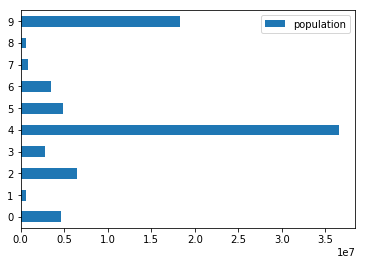

In [135]:
df[:10].plot.barh()
plt.show()

### SQLAlchemy ResultsProxy and Pandas Dataframes

In [137]:
# Create a DataFrame from the results: df
df = pd.DataFrame(results)

# Set column names
df.columns = results[0].keys()

# Print the Dataframe
print(df.head())

        state  population
0     Alabama     4649367
1      Alaska      664546
2     Arizona     6480767
3    Arkansas     2848432
4  California    36609002


### From SQLAlchemy results to a Graph

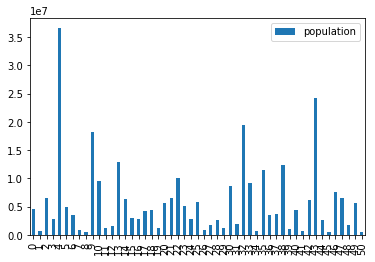

In [138]:
# Plot the DataFrame
df.plot.bar()
plt.show()


# Advanced SQLAlchemy Queries

## Calculating Values in a Query

#### Math Operators
- addition +
- subtraction -
- multiplication *
- division /
- modulus %

#### Caclulating Difference

In [143]:
stmt = select([
            census.columns.age,
            (census.columns.pop2008 - census.columns.pop2000).label('pop_change')]) \
        .group_by(
            census.columns.age) \
        .order_by(
            desc('pop_change')) \
        .limit(5)
        
results = connection.execute(stmt).fetchall()

results

[(61, 52672), (85, 51901), (54, 50808), (58, 45575), (60, 44915)]

#### Case Statement
- Used to treat data differently based on a condition
- Accepts a list of conditions to match and a column to return if the condition matches
- the list of conditions ends with an else clause to determine what to do when a record dosen't match any prior conditions

#### Case Example

In [145]:
from sqlalchemy import case

stmt = select([
    func.sum(
        case([
            (census.columns.state == 'New York',
             census.columns.pop2008)
        ], else_ = 0))])

results = connection.execute(stmt).fetchall()

results

[(19465159,)]

#### Cast Statement
- Converts data to another type
- Useful for converting
 - integers to floats for division
 - strings to dates and times
- Accepts a column or expression and the target Type

#### Percentage Example

In [146]:
from sqlalchemy import case, cast, Float

stmt = select([
    (func.sum(
        case([
            (census.columns.state == 'New York',
             census.columns.pop2008)
        ], else_ = 0)) /
    cast(func.sum(census.columns.pop2008),
        Float) * 100).label('ny_percent')])

result = connection.execute(stmt).fetchall()

result

/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/sqlalchemy/sql/sqltypes.py:596: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


[(Decimal('6.4267619765'),)]

### Connecting to a MySQL Database

In [153]:
# Import create_engine function
from sqlalchemy import create_engine

# Create an engine to the census database
engine = create_engine(
    'mysql+pymysql://' \
    'student:datacamp' \
    '@courses.csrrinzqubik.us-east-1.rds.amazonaws.com:3306/' \
    'census')

# Print the table names
print(engine.table_names())

['census', 'state_fact']


### Calculating a Difference between Two Columns

In [148]:
# Build query to return state names by population difference from 2008 to 2000: stmt
stmt = select([
        census.columns.state, 
        (census.columns.pop2008 - census.columns.pop2000).label('pop_change')
        ])

# Append group by for the state: stmt
stmt = stmt.group_by(census.columns.state)

# Append order by for pop_change descendingly: stmt
stmt = stmt.order_by(desc('pop_change'))

# Return only 5 results: stmt
stmt = stmt.limit(5)

# Use connection to execute the statement and fetch all results
results = connection.execute(stmt).fetchall()

# Print the state and population change for each record
for result in results:
    print('{}:{}'.format(result.state, result.pop_change))

California:105705
Florida:100984
Texas:51901
New York:47098
Pennsylvania:42387


### Determining the Overall Percentage of Females

In [149]:
# import case, cast and Float from sqlalchemy
from sqlalchemy import case, cast, Float

# Build an expression to calculate female population in 2000
female_pop2000 = func.sum(
    case([
        (census.columns.sex == 'F', census.columns.pop2000)
    ], else_=0))

# Cast an expression to calculate total population in 2000 to Float
total_pop2000 = cast(func.sum(census.columns.pop2000), Float)

# Build a query to calculate the percentage of females in 2000: stmt
stmt = select([female_pop2000 / total_pop2000 * 100])

# Execute the query and store the scalar result: percent_female
percent_female = connection.execute(stmt).scalar()

# Print the percentage
print(percent_female)


51.0946743229


/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/sqlalchemy/sql/sqltypes.py:596: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


## SQL Relationships

#### Relationships
- Allow us to avoid duplicate data
- Make it easy to change things in one place
- Useful to break out information from a table we don't need very often
- It sounds like these are somehow pre-defined to connect?
- He says sqlalchemy automaticaly finds the right join clause because it is pre-defined in the database. huh.

In [173]:
print(engine.table_names())

['census', 'state_fact']


In [174]:
census = Table('census', metadata, autoload=True, autoload_with=engine)
print(repr(census))

Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)


In [175]:
state_fact = Table('state_fact', metadata, autoload=True, autoload_with=engine)
print(repr(state_fact))

Table('state_fact', MetaData(bind=None), Column('id', VARCHAR(length=256), table=<state_fact>), Column('name', VARCHAR(length=256), table=<state_fact>), Column('abbreviation', VARCHAR(length=256), table=<state_fact>), Column('country', VARCHAR(length=256), table=<state_fact>), Column('type', VARCHAR(length=256), table=<state_fact>), Column('sort', VARCHAR(length=256), table=<state_fact>), Column('status', VARCHAR(length=256), table=<state_fact>), Column('occupied', VARCHAR(length=256), table=<state_fact>), Column('notes', VARCHAR(length=256), table=<state_fact>), Column('fips_state', VARCHAR(length=256), table=<state_fact>), Column('assoc_press', VARCHAR(length=256), table=<state_fact>), Column('standard_federal_region', VARCHAR(length=256), table=<state_fact>), Column('census_region', VARCHAR(length=256), table=<state_fact>), Column('census_region_name', VARCHAR(length=256), table=<state_fact>), Column('census_division', VARCHAR(length=256), table=<state_fact>), Column('census_divisio

In [176]:
stmt = select([
    census.columns.pop2008,
    state_fact.columns.abbreviation
])

results = connection.execute(stmt).fetchall()

results[0:10]

[(95012, 'IL'),
 (95012, 'NJ'),
 (95012, 'ND'),
 (95012, 'OR'),
 (95012, 'DC'),
 (95012, 'WI'),
 (95012, 'AZ'),
 (95012, 'AR'),
 (95012, 'CO'),
 (95012, 'HI')]

- Wow, that works. It seems like some kind of magic.
- I would be much more comfortable setting the join claus explicitly

#### Join
- Okay here we go, this is better
- Accepts a Table and an optional expression that explains how the two tables are related
- The expression is not needed if the relationship is predefined and available via reflection
- Comes immediately after the `select()` clause and prior to any `where()`, `order_by()`, or `group_by()` clauses

#### Select_from
- used to replace the default, derived FROM clause with a join
- wraps the `join()` clause
- he siad something about this being used when you want to use a table in the query but not select any columns from it. okay...?

#### Select_from Example
- though this should supposedly work because there is a foreign key connection between `census` and `state_fact`, for whatever reason it is not recognized here. 
- So I have to set the connection in the join clause

In [179]:
stmt = select([func.sum(census.columns.pop2000)])
stmt = stmt.select_from(census.join(state_fact, census.columns.state == state_fact.columns.name))
stmt = stmt.where(state_fact.columns.circuit_court == '10')
    
result = connection.execute(stmt).scalar()

print(result)
  

14945252


#### Joining Tables without Predefined Relationship
- Join accepts a Table and an optional expression that explains how the two tables are related
- Will only join on. data that match between the two columns
- Avoid joining on columns of different types

#### Select_from Example

In [180]:
stmt = select([func.sum(census.columns.pop2000)])
stmt = stmt.select_from(census.join(state_fact, census.columns.state==state_fact.columns.name))
stmt = stmt.where(state_fact.columns.census_division_name == 'East South Central')

result = connection.execute(stmt).scalar()
print(result)

16982311


### Automatic Joins with an Established Relationship

In [181]:
# Build a statement to join census and state_fact tables: stmt
stmt = select([
    census.columns.pop2000, 
    state_fact.columns.abbreviation])

# Execute the statement and get the first result: result
result = connection.execute(stmt).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))


pop2000 89600
abbreviation IL


### Joins

In [182]:
# Build a statement to select the census and state_fact tables: stmt
stmt = select([census, state_fact])

# Add a select_from clause that wraps a join for the census and state_fact
# tables where the census state column and state_fact name column match
stmt = stmt.select_from(
    census.join(state_fact, census.columns.state == state_fact.columns.name))

# Execute the statement and get the first result: result
result = connection.execute(stmt).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))


state Illinois
sex M
age 0
pop2000 89600
pop2008 95012
id 13
name Illinois
abbreviation IL
country USA
type state
sort 10
status current
occupied occupied
notes 
fips_state 17
assoc_press Ill.
standard_federal_region V
census_region 2
census_region_name Midwest
census_division 3
census_division_name East North Central
circuit_court 7


### More Practice with Joins

In [183]:
# Build a statement to select the state, sum of 2008 population and census
# division name: stmt
stmt = select([
    census.columns.state,
    func.sum(census.columns.pop2008),
    state_fact.columns.census_division_name
])

# Append select_from to join the census and state_fact tables by the census state and state_fact name columns
stmt = stmt.select_from(
    census.join(state_fact, census.columns.state == state_fact.columns.name)
)

# Append a group by for the state_fact name column
stmt = stmt.group_by(state_fact.columns.name)

# Execute the statement and get the results: results
results = connection.execute(stmt).fetchall()

# Loop over the the results object and print each record.
for record in results:
    print(record)


('Alabama', 4649367, 'East South Central')
('Alaska', 664546, 'Pacific')
('Arizona', 6480767, 'Mountain')
('Arkansas', 2848432, 'West South Central')
('California', 36609002, 'Pacific')
('Colorado', 4912947, 'Mountain')
('Connecticut', 3493783, 'New England')
('Delaware', 869221, 'South Atlantic')
('Florida', 18257662, 'South Atlantic')
('Georgia', 9622508, 'South Atlantic')
('Hawaii', 1250676, 'Pacific')
('Idaho', 1518914, 'Mountain')
('Illinois', 12867077, 'East North Central')
('Indiana', 6373299, 'East North Central')
('Iowa', 3000490, 'West North Central')
('Kansas', 2782245, 'West North Central')
('Kentucky', 4254964, 'East South Central')
('Louisiana', 4395797, 'West South Central')
('Maine', 1312972, 'New England')
('Maryland', 5604174, 'South Atlantic')
('Massachusetts', 6492024, 'New England')
('Michigan', 9998854, 'East North Central')
('Minnesota', 5215815, 'West North Central')
('Mississippi', 2922355, 'East South Central')
('Missouri', 5891974, 'West North Central')
('Mon

## Working with Hierarchical Tables

#### Hierarchical Tables
- These are self-referential tables or tables that join with them selves. wat
- Contain a relationship with themselves
- Commonly found in:
 - Organizational, Geographic, Network, Graph
- Example
 - Like  a table of employees with an employee_id, and a manager column that references the employee_ids in the same table. makes sense
- `alias()`
 - Requires a way to view the table with multiple names
 - creates a unique reference that we can use

In [245]:
engine = create_engine('sqlite:///data/employees.sqlite')
connection = engine.connect()
engine.table_names()

['employees']

In [246]:
connection

In [247]:
metadata = MetaData()
employees = Table('employees', metadata, autoload = True, autoload_with = engine)
print(repr(employees))
print('------------------')
print(employees.columns.keys())

Table('employees', MetaData(bind=None), Column('id', INTEGER(), table=<employees>, primary_key=True, nullable=False), Column('name', VARCHAR(length=20), table=<employees>), Column('job', VARCHAR(length=20), table=<employees>), Column('mgr', INTEGER(), table=<employees>), Column('hiredate', DATETIME(), table=<employees>), Column('sal', NUMERIC(precision=7, scale=2), table=<employees>), Column('comm', NUMERIC(precision=7, scale=2), table=<employees>), Column('dept', INTEGER(), table=<employees>), schema=None)
------------------
['id', 'name', 'job', 'mgr', 'hiredate', 'sal', 'comm', 'dept']


In [257]:
managers = employees.alias()

stmt = select([
    managers.columns.name.label('mgr'),
    employees.columns.name.label('name')
])

stmt = stmt.select_from(employees.join(
        managers, managers.columns.id == employees.columns.mgr))

stmt = stmt.order_by(managers.columns.name)

connection.execute(stmt).fetchall()

[('FILLMORE', 'GRANT'),
 ('FILLMORE', 'ADAMS'),
 ('FILLMORE', 'MONROE'),
 ('GARFIELD', 'JOHNSON'),
 ('GARFIELD', 'LINCOLN'),
 ('GARFIELD', 'POLK'),
 ('GARFIELD', 'WASHINGTON'),
 ('HARDING', 'TAFT'),
 ('HARDING', 'HOOVER'),
 ('JACKSON', 'HARDING'),
 ('JACKSON', 'GARFIELD'),
 ('JACKSON', 'FILLMORE'),
 ('JACKSON', 'ROOSEVELT')]

#### Group_by and Func
- Hierarchical tables can get tricky when performing group bys or using functions
- Its important to think of it as two different tables
- You should focus on having the table in the group by or the alias in the function or vice versa
- It's important to target group_by() at the right alias
- Be careful with what you perform functions on
- If you don't find yourself using both the alias and the table name for a query, don't create the alias at all

#### Querying Hierarchical Data

In [259]:
managers = employees.alias()

stmt = select([
    managers.columns.name, 
    func.sum(employees.columns.sal)
])

stmt = stmt.select_from(employees.join(
    managers, managers.columns.id == employees.columns.mgr))

stmt = stmt.group_by(managers.columns.name)

connection.execute(stmt).fetchall()

[('FILLMORE', Decimal('96000.00')),
 ('GARFIELD', Decimal('83500.00')),
 ('HARDING', Decimal('52000.00')),
 ('JACKSON', Decimal('197000.00'))]

### Using alias to handle same table joined queries

In [260]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select manager's and their employees names: stmt
stmt = select(
    [managers.columns.name.label('manager'),
     employees.columns.name.label('employee')]
)

# Match managers id with employees mgr: stmt
stmt = stmt.where(managers.columns.id == employees.columns.mgr)

# Order the statement by the managers name: stmt
stmt = stmt.order_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt).fetchall()

# Print records
for record in results:
    print(record)


('FILLMORE', 'GRANT')
('FILLMORE', 'ADAMS')
('FILLMORE', 'MONROE')
('GARFIELD', 'JOHNSON')
('GARFIELD', 'LINCOLN')
('GARFIELD', 'POLK')
('GARFIELD', 'WASHINGTON')
('HARDING', 'TAFT')
('HARDING', 'HOOVER')
('JACKSON', 'HARDING')
('JACKSON', 'GARFIELD')
('JACKSON', 'FILLMORE')
('JACKSON', 'ROOSEVELT')


### Leveraging Functions and Group_bys with Hierarchical Data
- It's also common to want to roll up data which is in a hierarchical table. 
- Rolling up data requires making sure you're careful which alias you use to perform the group_bys and which table you use for the function.

In [261]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select managers and counts of their employees: stmt
stmt = select([
    managers.columns.name, 
    func.count(employees.columns.id)])

# Append a where clause that ensures the manager id and employee mgr are equal
stmt = stmt.where(managers.columns.id == employees.columns.mgr)

# Group by Managers Name
stmt = stmt.group_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt).fetchall()

# print manager
for record in results:
    print(record)


('FILLMORE', 3)
('GARFIELD', 4)
('HARDING', 2)
('JACKSON', 4)


## Dealing with Large ResultSets

#### Dealing with Large ResultSets
- `fetchmany()` lets us specify how many rows we want to act upon
- We can loop over `fetchmany()`
- It returns an empty list when there are no more records
- We have to close te ResultProxy afterwards

### Working on Blocks of Records

In [263]:
engine = create_engine('sqlite:///data/census.sqlite')

connection = engine.connect()

print(engine.table_names())

['census', 'state_fact']


In [272]:
stmt = 'SELECT * FROM census'

results_proxy = connection.execute(stmt)

results = results_proxy.fetchall()

results[:6]

[('Illinois', 'M', 0, 89600, 95012),
 ('Illinois', 'M', 1, 88445, 91829),
 ('Illinois', 'M', 2, 88729, 89547),
 ('Illinois', 'M', 3, 88868, 90037),
 ('Illinois', 'M', 4, 91947, 91111),
 ('Illinois', 'M', 5, 93894, 89802)]

In [278]:
stmt = 'SELECT * FROM census'
results_proxy = connection.execute(stmt)
more_results = True
state_count = {}

# Start a while loop checking for more results
while more_results:
    # Fetch the first 50 results from the ResultProxy: partial_results
    partial_results = results_proxy.fetchmany(50)

    # if empty list, set more_results to False
    if partial_results == []:
        more_results = False

    # Loop over the fetched records and increment the count for the state
    for row in partial_results:
        if row.state in state_count:
            state_count[row.state] += 1
        else:
            state_count[row.state] = 1

# Close the ResultProxy, and thus the connection
results_proxy.close()

# Print the count by state
state_count


{'Alabama': 172,
 'Alaska': 172,
 'Arizona': 172,
 'Arkansas': 172,
 'California': 172,
 'Colorado': 172,
 'Connecticut': 172,
 'Delaware': 172,
 'District of Columbia': 172,
 'Florida': 172,
 'Georgia': 172,
 'Hawaii': 172,
 'Idaho': 172,
 'Illinois': 172,
 'Indiana': 172,
 'Iowa': 172,
 'Kansas': 172,
 'Kentucky': 172,
 'Louisiana': 172,
 'Maine': 172,
 'Maryland': 172,
 'Massachusetts': 172,
 'Michigan': 172,
 'Minnesota': 172,
 'Mississippi': 172,
 'Missouri': 172,
 'Montana': 172,
 'Nebraska': 172,
 'Nevada': 172,
 'New Hampshire': 172,
 'New Jersey': 172,
 'New Mexico': 172,
 'New York': 172,
 'North Carolina': 172,
 'North Dakota': 172,
 'Ohio': 172,
 'Oklahoma': 172,
 'Oregon': 172,
 'Pennsylvania': 172,
 'Rhode Island': 172,
 'South Carolina': 172,
 'South Dakota': 172,
 'Tennessee': 172,
 'Texas': 172,
 'Utah': 172,
 'Vermont': 172,
 'Virginia': 172,
 'Washington': 172,
 'West Virginia': 172,
 'Wisconsin': 172,
 'Wyoming': 172}

# Creating and Manipulating your own Databases

## Creating Databases and Tables

#### Creating Databases
- Varies by the database type
- Databases like PostgreSQL and MySQL have command line tools to initialize the database
 - This is beyond the scope of this class
- However, with SQLite, the create_engine() statement will create the database and file if they do not already exist.

#### Building a Table

In [301]:
from sqlalchemy import (Table, Column, String, Integer, Boolean, Float)

engine = create_engine('sqlite:///data/employees2')
metadata = MetaData()

employees = Table('employees', metadata,
                  Column('id', Integer()),
                  Column('name', String(255)),
                  Column('salary', Float()),
                  Column('active', Boolean())
                )

metadata.create_all(engine)

engine.table_names()

['data', 'employees']

#### Creating Tables
- Still uses the Table object like we did for reflection
- Replaces the autoload keyword arguments with Column objects
- Creates the tables in the actual datbase by using the create_all() method on the MetaData instance
- While you can create a table with sqlalchemy, if you want to add columns or modify existing tables, you need to use other tools to handle database table updates, such as Alemic or raw SQL

#### Creating Tables - Additonal Column Options
- `unique` forces all values for the data in a column to be unique
- `nullable` determines if a column can be empty in a row
- `default` sets a default value if one isn't supplied

In [302]:
employees = Table('employees', metadata,
                  Column('id', Integer()),
                  Column('name', String(255), unique = True, nullable = False),
                  Column('salary', Float(), default = 100.00),
                  Column('active', Boolean(), default = True),
                  extend_existing = True
                 )

employees.constraints

{CheckConstraint(<sqlalchemy.sql.elements.BinaryExpression object at 0x112aef780>, name='_unnamed_', table=Table('employees', MetaData(bind=None), Column('id', Integer(), table=<employees>), Column('name', String(length=255), table=<employees>, nullable=False), Column('salary', Float(), table=<employees>, default=ColumnDefault(100.0)), Column('active', Boolean(), table=<employees>, default=ColumnDefault(True)), schema=None), _create_rule=<sqlalchemy.util.langhelpers.portable_instancemethod object at 0x112d4fea0>, _type_bound=True),
 CheckConstraint(<sqlalchemy.sql.elements.BinaryExpression object at 0x112bc7c88>, name='_unnamed_', table=Table('employees', MetaData(bind=None), Column('id', Integer(), table=<employees>), Column('name', String(length=255), table=<employees>, nullable=False), Column('salary', Float(), table=<employees>, default=ColumnDefault(100.0)), Column('active', Boolean(), table=<employees>, default=ColumnDefault(True)), schema=None), _create_rule=<sqlalchemy.util.lan

### Creating Tables with SQLAlchemy

In [303]:
# Import Table, Column, String, Integer, Float, Boolean from sqlalchemy
from sqlalchemy import Table, Column, String, Integer, Float, Boolean

# Define a new table with a name, count, amount, and valid column: data
data = Table('data', metadata,
             Column('name', String(255)),
             Column('count', Integer()),
             Column('amount', Float()),
             Column('valid', Boolean())
)

# Use the metadata to create the table
metadata.create_all(engine)

# Print table details
print(repr(data))


Table('data', MetaData(bind=None), Column('name', String(length=255), table=<data>), Column('count', Integer(), table=<data>), Column('amount', Float(), table=<data>), Column('valid', Boolean(), table=<data>), schema=None)


### Constraints and Data Defaults

In [312]:
# Import Table, Column, String, Integer, Float, Boolean from sqlalchemy
from sqlalchemy import Table, Column, String, Integer, Float, Boolean

# Define a new table with a name, count, amount, and valid column: data
data = Table('data', metadata,
             Column('name', String(255), unique=True),
             Column('count', Integer(), default=1),
             Column('amount', Float()),
             Column('valid', Boolean(), default=False),
             extend_existing = True
)

# Use the metadata to create the table
metadata.create_all(engine)

# Print the table details
print(repr(metadata.tables['data']))


Table('data', MetaData(bind=None), Column('name', String(length=255), table=<data>), Column('count', Integer(), table=<data>, default=ColumnDefault(1)), Column('amount', Float(), table=<data>), Column('valid', Boolean(), table=<data>, default=ColumnDefault(False)), schema=None)


## Inserting Data into a Table

#### Adding Data to a Table
- Done with the `insert()` statement
- `Insert()` takes the table we are loading data inot as the argument
- We add all values we want to insert in with the `values` clause as `column = value` pairs
- Doesn't return any rows, so no need for a fetch method

#### Inserting One Row

In [339]:
from sqlalchemy import insert

stmt = insert(employees).values(id = 1, name = 'Jason', salary = 1.00, active = True)

result_proxy = connection.execute(stmt)

print(result_proxy.rowcount)

1


#### Inserting Multiple Rows
- Build an insert statement without any values
- Build a list of dictionaries that represent all the values clauses for the rows you want to insert
- Pass both the stmt and the values lit to the execute method on connection

In [340]:
stmt = insert(employees)
values_list = [{'id':2, 'name': 'Rebecca', 'salary':2.00, 'active': True},
               {'id':3, 'name': 'Bob', 'salary': 0.00, 'active': False}]

result_proxy = connection.execute(stmt, values_list)
print(result_proxy.rowcount)

2


### Inserting a single row with an insert() statement

In [341]:
engine.table_names()

['census', 'data', 'employees']

In [316]:
print(repr(metadata.tables['data']))

Table('data', MetaData(bind=None), Column('name', String(length=255), table=<data>), Column('count', Integer(), table=<data>, default=ColumnDefault(1)), Column('amount', Float(), table=<data>), Column('valid', Boolean(), table=<data>, default=ColumnDefault(False)), schema=None)


In [317]:
connection = engine.connect()

In [318]:
# Import insert and select from sqlalchemy
from sqlalchemy import insert, select

# Build an insert statement to insert a record into the data table: stmt
stmt = insert(data).values(name='Anna', count=1, amount=1000.00, valid=True)

# Execute the statement via the connection: results
results = connection.execute(stmt)

# Print result rowcount
print(results.rowcount)

1


In [319]:
# Build a select statement to validate the insert
stmt = select([data]).where(data.columns.name == 'Anna')

# Print the result of executing the query.
print(connection.execute(stmt).first())

('Anna', 1, 1000.0, True)


### Inserting Multiple Records at Once

In [320]:
# Build a list of dictionaries: values_list
values_list = [
    {'name': 'Anna', 'count': 1, 'amount': 1000.00, 'valid': True},
    {'name': 'Taylor', 'count': 1, 'amount': 750.00, 'valid': False}
]

# Build an insert statement for the data table: stmt
stmt = insert(data)

# Execute stmt with the values_list: results
results = connection.execute(stmt, values_list)

# Print rowcount
print(results.rowcount)


2


### Loading a CSV into a Table

In [322]:
census = Table('census', metadata,
             Column('state', String(255)),
             Column('sex', String(255)),
             Column('age', Integer()),
             Column('pop2000', Integer()),
             Column('pop2008', Integer()))

# Use the metadata to create the table
metadata.create_all(engine)

# Print the table details
print(repr(metadata.tables['census']))

Table('census', MetaData(bind=None), Column('state', String(length=255), table=<census>), Column('sex', String(length=255), table=<census>), Column('age', Integer(), table=<census>), Column('pop2000', Integer(), table=<census>), Column('pop2008', Integer(), table=<census>), schema=None)


In [323]:
engine.table_names()

['census', 'data', 'employees']

In [324]:
connection = engine.connect()

In [332]:
# Create a insert statement for census: stmt
stmt = insert(census)

# Create an empty list and zeroed row count: values_list, total_rowcount
values_list = []
total_rowcount = 0

# Enumerate the rows of csv_reader
with open('data/census.csv', 'r') as f :
    csv_reader = csv.reader(f)
    for idx, row in enumerate(csv_reader):
        #create data and append to values_list
        data = {'state': row[0], 'sex': row[1], 'age': row[2], 'pop2000': row[3],
                'pop2008': row[4]}
        values_list.append(data)

        # Check to see if divisible by 51
        if idx % 51 == 0:
            results = connection.execute(stmt, values_list)
            total_rowcount += results.rowcount
            values_list = []

# Print total rowcount
print(total_rowcount)


8722


- Holy cow, I got it to work. 
 - I had to create the table, download the file and wrap my own csv_reader to enumnerate. Cool

## Updating Data in a Database

#### Updating Data in a Table
- Done with the update statement
- Similar to the insert statement but includes a where clause to determine what record will be updated
- We add all the values we want to update with the values clause as `column=value` pairs

#### Updating One Row

In [342]:
from sqlalchemy import update

stmt = update(employees) \
    .where(employees.columns.id == 1) \
    .values(active=True)

result_proxy = connection.execute(stmt)

print(result_proxy.rowcount)

1


#### Updating Multiple Rows
- Build a where clause that will select all the records you want to update

In [343]:
stmt = update(employees)

stmt = stmt.where(employees.columns.active == True)

stmt = stmt.values(active=False, salary=0.00)

result_proxy = connection.execute(stmt)

print(result_proxy.rowcount)

3


#### Correlated Updates
- uses a `select()` statement to find the value for the column we are updating
- Commonly used to update records to a maximum value or change a string to match an abbreviation from another table
- here, first we need to build a select statement to get the max value
- then we build an update statement with no where clause so all values are updated

In [344]:
new_salary = select([employees.columns.salary])
new_salary = new_salary.order_by(desc(employees.columns.salary))
new_salary = new_salary.limit(1)

stmt = update(employees)
stmt = stmt.values(salary= new_salary)
result_roxy = connection.execute(stmt)
print(result_proxy.rowcount)

3


### Updating individual records

In [345]:
engine = create_engine('sqlite:///data/census.sqlite')
connection = engine.connect()
engine.table_names()

['census', 'employees', 'state_fact']

In [347]:
state_fact

Table('state_fact', MetaData(bind=None), Column('id', VARCHAR(length=256), table=<state_fact>), Column('name', VARCHAR(length=256), table=<state_fact>), Column('abbreviation', VARCHAR(length=256), table=<state_fact>), Column('country', VARCHAR(length=256), table=<state_fact>), Column('type', VARCHAR(length=256), table=<state_fact>), Column('sort', VARCHAR(length=256), table=<state_fact>), Column('status', VARCHAR(length=256), table=<state_fact>), Column('occupied', VARCHAR(length=256), table=<state_fact>), Column('notes', VARCHAR(length=256), table=<state_fact>), Column('fips_state', VARCHAR(length=256), table=<state_fact>), Column('assoc_press', VARCHAR(length=256), table=<state_fact>), Column('standard_federal_region', VARCHAR(length=256), table=<state_fact>), Column('census_region', VARCHAR(length=256), table=<state_fact>), Column('census_region_name', VARCHAR(length=256), table=<state_fact>), Column('census_division', VARCHAR(length=256), table=<state_fact>), Column('census_divisio

In [349]:
# Build a select statement: select_stmt
select_stmt = select([state_fact]).where(state_fact.columns.name == 'New York')

# Print the results of executing the select_stmt
print(connection.execute(select_stmt).fetchall())

[('32', 'New York', 'NY', 'USA', 'state', '10', 'current', 'occupied', '', '36', 'N.Y.', 'II', '1', 'Northeast', '2', 'Mid-Atlantic', '2')]


In [351]:
# Build a statement to update the fips_state to 36: stmt
stmt = update(state_fact).values(id = 36)

# Append a where clause to limit it to records for New York state
stmt = stmt.where(state_fact.columns.name == 'New York')

# Execute the statement: results
results = connection.execute(stmt)

# Print rowcount
print(results.rowcount)

# Execute the select_stmt again to view the changes
print(connection.execute(select_stmt).fetchall())

1
[('36', 'New York', 'NY', 'USA', 'state', '10', 'current', 'occupied', '', '36', 'N.Y.', 'II', '1', 'Northeast', '2', 'Mid-Atlantic', '2')]


### Updating Multiple Records

In [353]:
# Build a statement to update the notes to 'The Wild West': stmt
stmt = update(state_fact).values(notes='The Wild West')

# Append a where clause to match the West census region records
stmt = stmt.where(state_fact.columns.census_region_name == 'West')

# Execute the statement: results
results = connection.execute(stmt)

# Print rowcount
print(results.rowcount)


13


In [354]:
select_stmt = select([state_fact]).where(state_fact.columns.notes == 'The Wild West')
print(connection.execute(select_stmt).fetchall())

[('37', 'Oregon', 'OR', 'USA', 'state', '10', 'current', 'occupied', 'The Wild West', '41', 'Ore.', 'X', '4', 'West', '9', 'Pacific', '9'), ('3', 'Arizona', 'AZ', 'USA', 'state', '10', 'current', 'occupied', 'The Wild West', '4', 'Ariz.', 'IX', '4', 'West', '8', 'Mountain', '9'), ('6', 'Colorado', 'CO', 'USA', 'state', '10', 'current', 'occupied', 'The Wild West', '8', 'Colo.', 'VIII', '4', 'West', '8', 'Mountain', '10'), ('11', 'Hawaii', 'HI', 'USA', 'state', '10', 'current', 'occupied', 'The Wild West', '15', 'Hawaii', 'IX', '4', 'West', '9', 'Pacific', '9'), ('26', 'Montana', 'MT', 'USA', 'state', '10', 'current', 'occupied', 'The Wild West', '30', 'Mont.', 'VIII', '4', 'West', '8', 'Mountain', '9'), ('12', 'Idaho', 'ID', 'USA', 'state', '10', 'current', 'occupied', 'The Wild West', '16', 'Idaho', 'X', '4', 'West', '8', 'Mountain', '9'), ('50', 'Wyoming', 'WY', 'USA', 'state', '10', 'current', 'occupied', 'The Wild West', '56', 'Wyo.', 'VIII', '4', 'West', '8', 'Mountain', '10'), ('

### Correlated Updates

I don't have the flattened flat_census table and don't feel like making it but here is the code from the exercise used to join on to it

In [ ]:
# Build a statement to select name from state_fact: stmt
fips_stmt = select([state_fact.columns.name])

# Append a where clause to Match the fips_state to flat_census fips_code
fips_stmt = fips_stmt.where(
    state_fact.columns.fips_state == flat_census.columns.fips_code)

# Build an update statement to set the name to fips_stmt: update_stmt
update_stmt = update(flat_census).values(state_name=fips_stmt)

# Execute update_stmt: results
results = connection.execute(update_stmt)

# Print rowcount
print(results.rowcount)


## Removing Data From a Database

#### Deleting Data from a Table
- Done with the `delete()` statement
- `delete()` takes the table we are loading data into as the argument
- A `where()` clause is used to choose which rows to delete
- Its Hard to undo so be careful!!

#### Deleting all Data from a Table

In [360]:
engine.table_names()

['census', 'employees', 'state_fact']

In [361]:
## Lets see whats in our recently made employees table
stmt = select([employees])
results = connection.execute(stmt).fetchall()
results

[(1, 'Jason', 1.0, True),
 (1, 'Jason', 1.0, True),
 (1, 'Jason', 1.0, True),
 (1, 'Jason', 2.0, True),
 (2, 'Jason', 2.0, True),
 (2, 'Will', 2.0, True),
 (2, 'Rebecca', 2.0, True),
 (3, 'Bob', 0.0, False),
 (1, 'Jason', 1.0, True)]

In [362]:
## Its good to do a row check first
from sqlalchemy import delete

stmt = select([func.count(employees.columns.id)])

connection.execute(stmt).scalar()

9

In [363]:
## And now we can delete and see how many rows were effected
delete_stmt = delete(employees)
result_proxy = connection.execute(delete_stmt)
result_proxy.rowcount

9

#### Deleting Specific Rows

In [365]:
# First lets put some data back
stmt = insert(employees)
values_list = [
    {'id':0, 'name': 'Joe', 'salary':2.00, 'active': True},
    {'id':1, 'name': 'Jill', 'salary':2.00, 'active': True},
    {'id':2, 'name': 'Rebecca', 'salary':2.00, 'active': True},
    {'id':3, 'name': 'Bob', 'salary': 0.00, 'active': False}]

result_proxy = connection.execute(stmt, values_list)
print(result_proxy.rowcount)

4


In [366]:
stmt = delete(employees).where(employees.columns.id == 3)
results_proxy = connection.execute(stmt)
results_proxy.rowcount

1

#### Dropping a table Completely
- Uses the drop method on the table
- Accepts the engine as an argument so it knows where to remove the table from
- Won't remove it from the metadata until the python process is restarted

#### Dropping a table

In [367]:
employees.drop(engine)
print(employees.exists(engine))

False


#### Dropping all the Tables
- Uses the drop_all() method on MetaData

In [369]:
engine.table_names()

['state_fact']

In [370]:
metadata.drop_all(engine)
engine.table_names()

['state_fact']

In [371]:
state_fact.exists(engine)

True

- Welp thats wierd. Maybe state facts is not in the metadata or something.

### Deleting all the records from a table

In [373]:
engine = create_engine('sqlite:///data/census2.sqlite')
connection = engine.connect()
engine.table_names()

['census', 'state_fact']

In [374]:
# Import delete, select
from sqlalchemy import delete, select

# Build a statement to empty the census table: stmt
stmt = delete(census)

# Execute the statement: results
results = connection.execute(stmt)

# Print affected rowcount
print(results.rowcount)

# Build a statement to select all records from the census table
stmt = select([census])

# Print the results of executing the statement to verify there are no rows
print(connection.execute(stmt).fetchall())


8772
[]


### Deleting specific records

In [378]:
engine = create_engine('sqlite:///data/census3.sqlite')
connection = engine.connect()
engine.table_names()

['census', 'state_fact']

In [379]:
# Build a statement to count records using the sex column for Men ('M') age 36: stmt
stmt = select([func.count(census.columns.sex)]) \
    .where(
      and_(census.columns.sex == 'M',
           census.columns.age == 36)
)

# Execute the select statement and use the scalar() fetch method to save the record count
to_delete = connection.execute(stmt).scalar()

# Build a statement to delete records from the census table: stmt_del
stmt_del = delete(census)

# Append a where clause to target Men ('M') age 36
stmt_del = stmt_del.where(
    and_(census.columns.sex == 'M',
         census.columns.age == 36)
)

# Execute the statement: results
results = connection.execute(stmt_del)

# Print affected rowcount and to_delete record count, make sure they match
print(results.rowcount, to_delete)


51 51


### Deleting a Table Completely

In [380]:
# Drop the state_fact table
state_fact.drop(engine)

# Check to see if state_fact exists
print(state_fact.exists(engine))

False


In [381]:
# Drop all tables
engine.table_names()

metadata.drop_all(engine)

# Check to see if census exists
print(census.exists(engine))

False


# Putting it all together

## Census Case Study

#### Steps
- Preparing SQLAlchemy and the Database
- Loading Data into the Database
- Solving Dat Science Problems with Queries

### Setup the Engine and MetaData

In [382]:
# Import create_engine, MetaData
from sqlalchemy import create_engine, MetaData

# Define an engine to connect to chapter5.sqlite: engine
engine = create_engine('sqlite:///chapter5.sqlite')

# Initialize MetaData: metadata
metadata = MetaData()


### Create the Table to the Database

In [383]:
# Import Table, Column, String, and Integer
from sqlalchemy import Table, Column, String, Integer

# Build a census table: census
census = Table('census', metadata,
               Column('state', String(30)),
               Column('sex', String(1)),
               Column('age', Integer()),
               Column('pop2000', Integer()),
               Column('pop2008', Integer()))

# Create the table in the database
metadata.create_all(engine)


In [384]:
engine.table_names()

['census']

In [387]:
# Print the table details
print(repr(metadata.tables['census']))

Table('census', MetaData(bind=None), Column('state', String(length=30), table=<census>), Column('sex', String(length=1), table=<census>), Column('age', Integer(), table=<census>), Column('pop2000', Integer(), table=<census>), Column('pop2008', Integer(), table=<census>), schema=None)


## Populating the Database

### Reading the Data from the CSV

In [385]:
# Create an empty list: values_list
values_list = []

# Iterate over the rows
with open('data/census.csv','r') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        # Create a dictionary with the values
        data = {'state': row[0], 'sex': row[1], 'age':row[2], 'pop2000': row[3], 'pop2008': row[4]}
        # Append the dictionary to the values list
        values_list.append(data)


### Load Data from a list into the Table

In [388]:
connection = engine.connect()

In [389]:
# Import insert
from sqlalchemy import insert

# Build insert statement: stmt
stmt = insert(census)

# Use values_list to insert data: results
results = connection.execute(stmt, values_list)

# Print rowcount
print(results.rowcount)


8772


## Example Queries

### Build a Query to Determine the Average Age by Population

In [390]:
# Import select
from sqlalchemy import select

# Calculate weighted average age: stmt
stmt = select([census.columns.sex,
               (func.sum(census.columns.pop2008 * census.columns.age) /
                func.sum(census.columns.pop2008)).label('average_age')
               ])

# Group by sex
stmt = stmt.group_by(census.columns.sex)

# Execute the query and store the results: results
results = connection.execute(stmt).fetchall()

# Print the average age by sex
for result in results:
    print(result.sex, result.average_age)


F 38
M 35


### Build a Query to Determine the Percentage of Population by Gender and State

In [391]:
# import case, cast and Float from sqlalchemy
from sqlalchemy import case, cast, Float

# Build a query to calculate the percentage of females in 2000: stmt
stmt = select([census.columns.state,
    (func.sum(
        case([
            (census.columns.sex == 'F', census.columns.pop2000)
        ], else_=0)) /
     cast(func.sum(census.columns.pop2000), Float) * 100).label('percent_female')
])

# Group By state
stmt = stmt.group_by(census.columns.state)

# Execute the query and store the results: results
results = connection.execute(stmt).fetchall()

# Print the percentage
for result in results:
    print(result.state, result.percent_female)


Alabama 51.8324077702
Alaska 49.3014978935
Arizona 50.2236130306
Arkansas 51.2699284622
California 50.3523321490
Colorado 49.8476706030
Connecticut 51.6681650713
Delaware 51.6110973356
District of Columbia 53.1296261417
Florida 51.3648800117
Georgia 51.1140835034
Hawaii 51.1180118369
Idaho 49.9897262390
Illinois 51.1122423480
Indiana 50.9548031330
Iowa 50.9503983425
Kansas 50.8218641078
Kentucky 51.3268703693
Louisiana 51.7535159655
Maine 51.5057081342
Maryland 51.9357554997
Massachusetts 51.8430235713
Michigan 50.9724651832
Minnesota 50.4933294430
Mississippi 51.9222948179
Missouri 51.4688860264
Montana 50.3220269073
Nebraska 50.8584549336
Nevada 49.3673636138
New Hampshire 50.8580198450
New Jersey 51.5171395613
New Mexico 51.0471720798
New York 51.8345386515
North Carolina 51.4822623221
North Dakota 50.5006936323
Ohio 51.4655035002
Oklahoma 51.1136245708
Oregon 50.4294670362
Pennsylvania 51.7404347305
Rhode Island 52.0734339190
South Carolina 51.7307212977
South Dakota 50.5258358137


/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/sqlalchemy/sql/sqltypes.py:596: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


### Build a Query to Determine the Difference by State from the 2000 and 2008 Censuses

In [392]:
# Build query to return state name and population difference from 2008 to 2000
stmt = select([census.columns.state,
     (census.columns.pop2008-census.columns.pop2000).label('pop_change')
])

# Group by State
stmt = stmt.group_by(census.columns.state)

# Order by Population Change
stmt = stmt.order_by(desc('pop_change'))

# Limit to top 10
stmt = stmt.limit(10)

# Use connection to execute the statement and fetch all results
results = connection.execute(stmt).fetchall()

# Print the state and population change for each record
for result in results:
    print('{}:{}'.format(result.state, result.pop_change))


California:105705
Florida:100984
Texas:51901
New York:47098
Pennsylvania:42387
Arizona:29509
Ohio:29392
Illinois:26221
Michigan:25126
North Carolina:24108


### Congratulations